<a href="https://colab.research.google.com/github/OmidGhadami95/Caregivers/blob/main/Caregivers_Narrative_Plus_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preprocessing**

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack, csr_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score

Merge PHQ_demographic to Narrative data

In [ ]:
# Read the CSV files
phq_df = pd.read_csv('PHQ_preprocessed.csv')
narrative_df = pd.read_csv('preprocessed_narrative.csv')

narrative_df_last_three = narrative_df.iloc[:, -3:]
merged_df = pd.concat([phq_df, narrative_df_last_three], axis=1)
merged_df.to_csv('Narrative_Plus_PHQ.csv', index=False)

merged_df.head()

,Participant ID,Age,Sex,Race,Ethnicity,Location,Employment,Education,Income,Health Insurance,Relationship to Loved One,Years Caring,Daily Caregiving Hours,PHQ_score,ACD,ADJ,UNI
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,yeah can i read questions first ok uh my name ...,palma real few artificial helpful loved many a...,yeah can i read questions first ok uh my name ...
1,2,0,0,0,0,1,0,0,1,0,0,1,1,1,ok ok so my name is jonathan im fergal years o...,fergal old biological old close same primary s...,ok ok so my name is jonathan i m fergal years ...
2,3,0,0,0,0,0,1,0,1,1,0,10,1,0,alright my full name is brian brian hemsworth ...,full old easy more much ill best problematic f...,alright my full name is brian brian hemsworth ...
3,4,0,0,0,0,0,0,0,0,0,1,10,0,1,yeah my name is montana franklin im years old ...,old dead easy ready same same same clinical se...,yeah my name is montana franklin i m years old...
4,5,0,0,0,0,1,1,0,1,0,1,10,0,1,ok im victor daniel my name is victor daniel y...,old challenging past ok social religious posit...,ok i m victor daniel my name is victor daniel ...


Merge ZBI_demographic to Narrative data

In [ ]:
# Read the CSV files
zbi_df = pd.read_csv('ZBI_preprocessed.csv')
narrative_df = pd.read_csv('preprocessed_narrative.csv')

narrative_df_last_three = narrative_df.iloc[:, -3:]
merged_df = pd.concat([zbi_df, narrative_df_last_three], axis=1)
merged_df.to_csv('Narrative_Plus_ZBI.csv', index=False)

merged_df.head()

,Participant ID,Age,Sex,Race,Ethnicity,Location,Employment,Education,Income,Health Insurance,Relationship to Loved One,Years Caring,Daily Caregiving Hours,ZBI_score,ACD,ADJ,UNI
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,yeah can i read questions first ok uh my name ...,palma real few artificial helpful loved many a...,yeah can i read questions first ok uh my name ...
1,2,0,0,0,0,1,0,0,1,0,0,1,1,0,ok ok so my name is jonathan im fergal years o...,fergal old biological old close same primary s...,ok ok so my name is jonathan i m fergal years ...
2,3,0,0,0,0,0,1,0,1,1,0,10,1,1,alright my full name is brian brian hemsworth ...,full old easy more much ill best problematic f...,alright my full name is brian brian hemsworth ...
3,4,0,0,0,0,0,0,0,0,0,1,10,0,1,yeah my name is montana franklin im years old ...,old dead easy ready same same same clinical se...,yeah my name is montana franklin i m years old...
4,5,0,0,0,0,1,1,0,1,0,1,10,0,1,ok im victor daniel my name is victor daniel y...,old challenging past ok social religious posit...,ok i m victor daniel my name is victor daniel ...


In [ ]:
print(merged_df.iloc[:, 0])

0      1
1      2
2      3
3      4
4      5
      ..
60    64
61    65
62    66
63    67
64    68
Name: Participant ID, Length: 65, dtype: int64


Feature Selection

Fishers

In [ ]:
# from rpy2.robjects import pandas2ri
# import rpy2.robjects as robjects
# pandas2ri.activate()


# def feature_selection(df, target_col, exclude_cols=None):
#     """
#     Perform feature selection using Fisher/Freeman-Halton exact tests.
#     Returns: list of selected features that have a p-value < 0.1 (most significant first)
#     """
#     def calculate_p_value(feature):
#         """Helper function for p-value calculation"""
#         try:
#             # Create a contingency table for the feature and target
#             contingency = pd.crosstab(df[feature], df[target_col])
#             # Filter out rows with all zeros
#             contingency = contingency.loc[(contingency != 0).any(axis=1)]
#             if contingency.size == 0 or contingency.shape[1] < 2:
#                 return None

#             # Convert the pandas DataFrame to an R object (assumes rpy2 is configured)
#             r_contingency = pandas2ri.py2rpy(contingency)
#             num_levels = contingency.shape[0]

#             # Use different R code depending on the number of levels
#             r_code = """
#             function(mat) {
#               test <- fisher.test(mat, workspace=1e8)
#               return(test$p.value)
#             }
#             """ if num_levels > 2 else """
#             function(mat) {
#               test <- fisher.test(mat, simulate.p.value=FALSE)
#               return(test$p.value)
#             }
#             """

#             # Calculate and return the p-value from R
#             return float(robjects.r(r_code)(r_contingency)[0])
#         except Exception as e:
#             print(f"Skipped {feature}: {str(e)}")
#             return None

#     # Exclude target and any additional columns
#     exclude = [target_col] + (exclude_cols if exclude_cols else [])
#     features = [col for col in df.columns if col not in exclude]

#     # Compute p-values for each feature
#     p_values = {}
#     for feature in features:
#         pval = calculate_p_value(feature)
#         if pval is not None:
#             p_values[feature] = pval

#     # Return features with p-value < 0.1, sorted by ascending p-value
#     selected_features = sorted([feature for feature, p in p_values.items() if p < 0.1],
#                                key=lambda x: p_values[x])
#     return selected_features

Chi-sqaure

In [ ]:
def feature_selection(data, target_column, drop_columns):
    # Create a copy of the data to avoid modifying the original
    df = data.copy()

    # Encode categorical variables using LabelEncoder
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

    # Handle missing values by filling them with the mode of each column
    df.fillna(df.mode().iloc[0], inplace=True)

    # Separate features and target variable
    X = df.drop(columns=drop_columns + [target_column])
    y = df[target_column]

    # Perform Chi-square test
    chi2_scores, p_values = chi2(X, y)

    # Create results DataFrame
    chi2_results = pd.DataFrame({
        'Feature': X.columns,
        'Chi2 Score': chi2_scores,
        'P-Value': p_values
    })

    # Sort by p-value and filter significant features
    significant_features = chi2_results[chi2_results['P-Value'] < 0.1]\
                          .sort_values(by='P-Value', ascending=True)

    # Return all significant features
    return significant_features['Feature'].tolist(), chi2_results

# **Narrative+PHQ**

##SVM

###ACD+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ADJ', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ACD', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'ACD', 'PHQ_score'])

# Extract the 'ACD' column for Bag of Words (BoW) transformation
acd_column = data['ACD']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ACD' column into BoW unigram features
acd_bow_features = vectorizer.fit_transform(acd_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train the model
    svm_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = svm_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.74
LOOCV Precision: 0.68
LOOCV Recall: 0.81

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

Confusion Matrix:
Depressed (0): 29 | Not Depressed (1): 10
Not Depressed (0): 5 | Depressed (1): 21


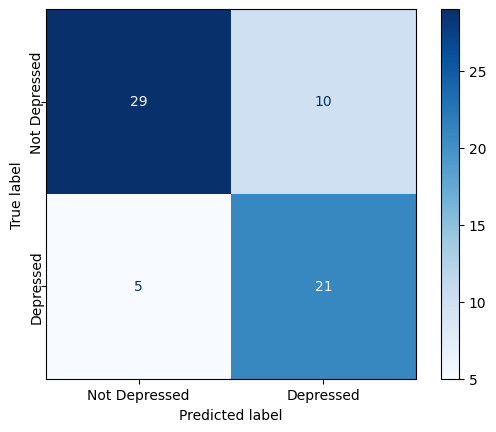

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Define custom labels
labels = ['Not Depressed', 'Depressed']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")

plt.yticks(rotation=90, ha='center', va='center')

print("Confusion Matrix:")
print(f"Depressed (0): {cm[0, 0]} | Not Depressed (1): {cm[0, 1]}")
print(f"Not Depressed (0): {cm[1, 0]} | Depressed (1): {cm[1, 1]}")

# Save the confusion matrix as an EPS file
plt.savefig("confusion_matrix.eps", format="eps", dpi=300, bbox_inches='tight')

plt.show()


###ADJ+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ACD', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ADJ', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'ADJ', 'PHQ_score'])

# Extract the 'ADJ' column for Bag of Words (BoW) transformation
adj_column = data['ADJ']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ADJ' column into BoW unigram features
adj_bow_features = vectorizer.fit_transform(adj_column)

# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ADJ BoW features
    X_train_combined = hstack([X_train_selected, adj_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, adj_bow_features[test_index]])

    # Train the model
    svm_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = svm_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.56
LOOCV Precision: 0.54
LOOCV Recall: 0.58

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

###UNI+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ACD', 'ADJ'], axis=1)

# Extract features (all columns except 'Participant ID', 'UNI', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'UNI', 'PHQ_score'])

# Extract the 'UNI' column for Bag of Words (BoW) transformation
uni_column = data['UNI']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'UNI' column into BoW unigram features
uni_bow_features = vectorizer.fit_transform(uni_column)


# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-UNI features
feature_names = features.columns.tolist()

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with UNI BoW features
    X_train_combined = hstack([X_train_selected, uni_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, uni_bow_features[test_index]])

    # Train the model
    svm_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = svm_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.64
LOOCV Precision: 0.63
LOOCV Recall: 0.65

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

##LR

###ACD+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ADJ', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ACD', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'ACD', 'PHQ_score'])

# Extract the 'ACD' column for Bag of Words (BoW) transformation
acd_column = data['ACD']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ACD' column into BoW unigram features
acd_bow_features = vectorizer.fit_transform(acd_column)


# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the logistic model
logistic_model = LogisticRegression()

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train the model
    logistic_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = logistic_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LOOCV F1 Score: 0.70
LOOCV Precision: 0.68
LOOCV Recall: 0.73

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

###ADJ+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ACD', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ADJ', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'ADJ', 'PHQ_score'])

# Extract the 'ADJ' column for Bag of Words (BoW) transformation
adj_column = data['ADJ']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ADJ' column into BoW unigram features
adj_bow_features = vectorizer.fit_transform(adj_column)


# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the logistic model
logistic_model = LogisticRegression()

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ADJ BoW features
    X_train_combined = hstack([X_train_selected, adj_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, adj_bow_features[test_index]])

    # Train the model
    logistic_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = logistic_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.56
LOOCV Precision: 0.54
LOOCV Recall: 0.58

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

###UNI+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ACD', 'ADJ'], axis=1)

# Extract features (all columns except 'Participant ID', 'UNI', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'UNI', 'PHQ_score'])

# Extract the 'UNI' column for Bag of Words (BoW) transformation
uni_column = data['UNI']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'UNI' column into BoW unigram features
uni_bow_features = vectorizer.fit_transform(uni_column)


# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-UNI features
feature_names = features.columns.tolist()

# Initialize the logistic model
logistic_model = LogisticRegression()

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with UNI BoW features
    X_train_combined = hstack([X_train_selected, uni_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, uni_bow_features[test_index]])

    # Train the model
    logistic_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = logistic_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.65
LOOCV Precision: 0.65
LOOCV Recall: 0.65

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

##KNN

###ACD+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ADJ', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ACD', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'ACD', 'PHQ_score'])

# Extract the 'ACD' column for Bag of Words (BoW) transformation
acd_column = data['ACD']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ACD' column into BoW unigram features
acd_bow_features = vectorizer.fit_transform(acd_column)


# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train the model
    knn_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = knn_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.46
LOOCV Precision: 0.46
LOOCV Recall: 0.46

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

###ADJ+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ACD', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ADJ', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'ADJ', 'PHQ_score'])

# Extract the 'ADJ' column for Bag of Words (BoW) transformation
adj_column = data['ADJ']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ADJ' column into BoW unigram features
adj_bow_features = vectorizer.fit_transform(adj_column)


# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ADJ BoW features
    X_train_combined = hstack([X_train_selected, adj_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, adj_bow_features[test_index]])

    # Train the model
    knn_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = knn_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.53
LOOCV Precision: 0.48
LOOCV Recall: 0.58

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

###UNI+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ACD', 'ADJ'], axis=1)

# Extract features (all columns except 'Participant ID', 'UNI', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'UNI', 'PHQ_score'])

# Extract the 'UNI' column for Bag of Words (BoW) transformation
uni_column = data['UNI']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'UNI' column into BoW unigram features
uni_bow_features = vectorizer.fit_transform(uni_column)


# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-UNI features
feature_names = features.columns.tolist()

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with UNI BoW features
    X_train_combined = hstack([X_train_selected, uni_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, uni_bow_features[test_index]])

    # Train the model
    knn_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = knn_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.40
LOOCV Precision: 0.42
LOOCV Recall: 0.38

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

##Random Forest

###ACD+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ADJ', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ACD', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'ACD', 'PHQ_score'])

# Extract the 'ACD' column for Bag of Words (BoW) transformation
acd_column = data['ACD']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()
acd_bow_features = vectorizer.fit_transform(acd_column)

# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)
feature_names = features.columns.tolist()

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOSO-CV
loo = LeaveOneOut()
labels_array = labels.values

# Track predictions and selected features
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Create DataFrame for feature selection
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Map selected feature names to indices
    selected_indices = [feature_names.index(f) for f in selected_features]

    # Select features
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train and predict
    rf_model.fit(X_train_combined, y_train)
    y_pred = rf_model.predict(X_test_combined)

    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Display selected features per fold
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count frequency of each feature
all_features = [f for sublist in all_selected_features for f in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.12
LOOCV Precision: 0.33
LOOCV Recall: 0.08

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

###ADJ+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ACD', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ADJ', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'ADJ', 'PHQ_score'])

# Extract the 'ADJ' column for Bag of Words (BoW) transformation
acd_column = data['ADJ']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()
acd_bow_features = vectorizer.fit_transform(acd_column)

# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)
feature_names = features.columns.tolist()

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOSO-CV
loo = LeaveOneOut()
labels_array = labels.values

# Track predictions and selected features
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Create DataFrame for feature selection
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Map selected feature names to indices
    selected_indices = [feature_names.index(f) for f in selected_features]

    # Select features
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train and predict
    rf_model.fit(X_train_combined, y_train)
    y_pred = rf_model.predict(X_test_combined)

    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Display selected features per fold
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count frequency of each feature
all_features = [f for sublist in all_selected_features for f in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.28
LOOCV Precision: 0.50
LOOCV Recall: 0.19

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

###UNI+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the CSV file
data = pd.read_csv("Narrative_Plus_PHQ.csv")
data = data.drop(['ACD', 'ADJ'], axis=1)

# Extract features (all columns except 'Participant ID', 'UNI', and 'PHQ_score')
features = data.drop(columns=['Participant ID', 'UNI', 'PHQ_score'])

# Extract the 'UNI' column for Bag of Words (BoW) transformation
acd_column = data['UNI']

# Extract the 'PHQ_score' column as the label
labels = data['PHQ_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()
acd_bow_features = vectorizer.fit_transform(acd_column)

# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)
feature_names = features.columns.tolist()

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOSO-CV
loo = LeaveOneOut()
labels_array = labels.values

# Track predictions and selected features
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Create DataFrame for feature selection
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    temp_train_df['PHQ_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='PHQ_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Map selected feature names to indices
    selected_indices = [feature_names.index(f) for f in selected_features]

    # Select features
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train and predict
    rf_model.fit(X_train_combined, y_train)
    y_pred = rf_model.predict(X_test_combined)

    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Display selected features per fold
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count frequency of each feature
all_features = [f for sublist in all_selected_features for f in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.24
LOOCV Precision: 0.57
LOOCV Recall: 0.15

All selected features:
Iteration 1: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 11: ['Location', 'Ye

# **Narrative+ZBI**

##SVM

###ACD+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ADJ', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ACD', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'ACD', 'ZBI_score'])

# Extract the 'ACD' column for Bag of Words (BoW) transformation
acd_column = data['ACD']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ACD' column into BoW unigram features
acd_bow_features = vectorizer.fit_transform(acd_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train the model
    svm_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = svm_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.73
LOOCV Precision: 0.72
LOOCV Recall: 0.74

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

###ADJ+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ACD', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ADJ', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'ADJ', 'ZBI_score'])

# Extract the 'ADJ' column for Bag of Words (BoW) transformation
adj_column = data['ADJ']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ADJ' column into BoW unigram features
adj_bow_features = vectorizer.fit_transform(adj_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ADJ BoW features
    X_train_combined = hstack([X_train_selected, adj_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, adj_bow_features[test_index]])

    # Train the model
    svm_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = svm_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")
# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.71
LOOCV Precision: 0.70
LOOCV Recall: 0.72

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

###UNI+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ACD', 'ADJ'], axis=1)

# Extract features (all columns except 'Participant ID', 'UNI', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'UNI', 'ZBI_score'])

# Extract the 'UNI' column for Bag of Words (BoW) transformation
uni_column = data['UNI']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'UNI' column into BoW unigram features
uni_bow_features = vectorizer.fit_transform(uni_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-UNI features
feature_names = features.columns.tolist()

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with UNI BoW features
    X_train_combined = hstack([X_train_selected, uni_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, uni_bow_features[test_index]])

    # Train the model
    svm_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = svm_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.67
LOOCV Precision: 0.69
LOOCV Recall: 0.64

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

##LR

###ACD+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ADJ', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ACD', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'ACD', 'ZBI_score'])

# Extract the 'ACD' column for Bag of Words (BoW) transformation
acd_column = data['ACD']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ACD' column into BoW unigram features
acd_bow_features = vectorizer.fit_transform(acd_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the logistic model
logistic_model = LogisticRegression()

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train the model
    logistic_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = logistic_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.73
LOOCV Precision: 0.72
LOOCV Recall: 0.74

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

###ADJ+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ACD', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ADJ', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'ADJ', 'ZBI_score'])

# Extract the 'ADJ' column for Bag of Words (BoW) transformation
adj_column = data['ADJ']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ADJ' column into BoW unigram features
adj_bow_features = vectorizer.fit_transform(adj_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the logistic model
logistic_model = LogisticRegression()

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ADJ BoW features
    X_train_combined = hstack([X_train_selected, adj_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, adj_bow_features[test_index]])

    # Train the model
    logistic_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = logistic_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.75
LOOCV Precision: 0.73
LOOCV Recall: 0.77

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

###UNI+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ACD', 'ADJ'], axis=1)

# Extract features (all columns except 'Participant ID', 'UNI', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'UNI', 'ZBI_score'])

# Extract the 'UNI' column for Bag of Words (BoW) transformation
uni_column = data['UNI']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'UNI' column into BoW unigram features
uni_bow_features = vectorizer.fit_transform(uni_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-UNI features
feature_names = features.columns.tolist()

# Initialize the logistic model
logistic_model = LogisticRegression()

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with UNI BoW features
    X_train_combined = hstack([X_train_selected, uni_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, uni_bow_features[test_index]])

    # Train the model
    logistic_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = logistic_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.71
LOOCV Precision: 0.73
LOOCV Recall: 0.69

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

##KNN

###ACD+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ADJ', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ACD', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'ACD', 'ZBI_score'])

# Extract the 'ACD' column for Bag of Words (BoW) transformation
acd_column = data['ACD']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ACD' column into BoW unigram features
acd_bow_features = vectorizer.fit_transform(acd_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train the model
    knn_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = knn_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.69
LOOCV Precision: 0.72
LOOCV Recall: 0.67

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

###ADJ+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ACD', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ADJ', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'ADJ', 'ZBI_score'])

# Extract the 'ADJ' column for Bag of Words (BoW) transformation
adj_column = data['ADJ']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'ADJ' column into BoW unigram features
adj_bow_features = vectorizer.fit_transform(adj_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-ACD features
feature_names = features.columns.tolist()

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with ADJ BoW features
    X_train_combined = hstack([X_train_selected, adj_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, adj_bow_features[test_index]])

    # Train the model
    knn_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = knn_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.75
LOOCV Precision: 0.78
LOOCV Recall: 0.72

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

###UNI+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ACD', 'ADJ'], axis=1)

# Extract features (all columns except 'Participant ID', 'UNI', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'UNI', 'ZBI_score'])

# Extract the 'UNI' column for Bag of Words (BoW) transformation
uni_column = data['UNI']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()

# Transform the 'UNI' column into BoW unigram features
uni_bow_features = vectorizer.fit_transform(uni_column)

#!!!!!!!!!!
# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)

# Get feature names for non-UNI features
feature_names = features.columns.tolist()

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize Leave-One-Subject-Out Cross-Validation (LOSO-CV)
loo = LeaveOneOut()

# Prepare labels as a numpy array
labels_array = labels.values

# Perform LOSO-CV
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Convert X_train (sparse) to a DataFrame using the original feature names
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    # Add the target column so that feature_selection can operate on it
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Get indices of selected features (from feature_names)
    selected_indices = [feature_names.index(feature) for feature in selected_features]

    # Select features for training and testing
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine selected features with UNI BoW features
    X_train_combined = hstack([X_train_selected, uni_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, uni_bow_features[test_index]])

    # Train the model
    knn_model.fit(X_train_combined, y_train)

    # Test the model
    y_pred = knn_model.predict(X_test_combined)

    # Store the results
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])


# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Print all selected features
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.63
LOOCV Precision: 0.62
LOOCV Recall: 0.64

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

##Random Forest

###ACD+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ADJ', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ACD', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'ACD', 'ZBI_score'])

# Extract the 'ACD' column for Bag of Words (BoW) transformation
acd_column = data['ACD']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()
acd_bow_features = vectorizer.fit_transform(acd_column)

# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)
feature_names = features.columns.tolist()

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOSO-CV
loo = LeaveOneOut()
labels_array = labels.values

# Track predictions and selected features
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Create DataFrame for feature selection
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Map selected feature names to indices
    selected_indices = [feature_names.index(f) for f in selected_features]

    # Select features
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train and predict
    rf_model.fit(X_train_combined, y_train)
    y_pred = rf_model.predict(X_test_combined)

    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Display selected features per fold
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count frequency of each feature
all_features = [f for sublist in all_selected_features for f in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.75
LOOCV Precision: 0.60
LOOCV Recall: 0.97

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

###ADJ+ZBI

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ACD', 'UNI'], axis=1)

# Extract features (all columns except 'Participant ID', 'ADJ', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'ADJ', 'ZBI_score'])

# Extract the 'ADJ' column for Bag of Words (BoW) transformation
acd_column = data['ADJ']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()
acd_bow_features = vectorizer.fit_transform(acd_column)

# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)
feature_names = features.columns.tolist()

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOSO-CV
loo = LeaveOneOut()
labels_array = labels.values

# Track predictions and selected features
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Create DataFrame for feature selection
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Map selected feature names to indices
    selected_indices = [feature_names.index(f) for f in selected_features]

    # Select features
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train and predict
    rf_model.fit(X_train_combined, y_train)
    y_pred = rf_model.predict(X_test_combined)

    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Display selected features per fold
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count frequency of each feature
all_features = [f for sublist in all_selected_features for f in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.77
LOOCV Precision: 0.65
LOOCV Recall: 0.95

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [

###UNI+PHQ

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the CSV file
data = pd.read_csv("Narrative_Plus_ZBI.csv")
data = data.drop(['ACD', 'ADJ'], axis=1)

# Extract features (all columns except 'Participant ID', 'UNI', and 'ZBI_score')
features = data.drop(columns=['Participant ID', 'UNI', 'ZBI_score'])

# Extract the 'UNI' column for Bag of Words (BoW) transformation
acd_column = data['UNI']

# Extract the 'ZBI_score' column as the label
labels = data['ZBI_score']

# Initialize CountVectorizer for unigram features
vectorizer = CountVectorizer()
acd_bow_features = vectorizer.fit_transform(acd_column)

# Convert categorical features to numeric
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column].astype(str))

# Convert features to sparse matrix
features_sparse = csr_matrix(features.values)
feature_names = features.columns.tolist()

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOSO-CV
loo = LeaveOneOut()
labels_array = labels.values

# Track predictions and selected features
predictions = []
true_labels = []
all_selected_features = []

for train_index, test_index in loo.split(features_sparse):
    X_train, X_test = features_sparse[train_index], features_sparse[test_index]
    y_train, y_test = labels_array[train_index], labels_array[test_index]

    # Create DataFrame for feature selection
    temp_train_df = pd.DataFrame(X_train.toarray(), columns=feature_names)
    temp_train_df['ZBI_score'] = y_train

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_df, target_column='ZBI_score', drop_columns=[])
    all_selected_features.append(selected_features)

    # Map selected feature names to indices
    selected_indices = [feature_names.index(f) for f in selected_features]

    # Select features
    X_train_selected = X_train[:, selected_indices]
    X_test_selected = X_test[:, selected_indices]

    # Combine with ACD BoW features
    X_train_combined = hstack([X_train_selected, acd_bow_features[train_index]])
    X_test_combined = hstack([X_test_selected, acd_bow_features[test_index]])

    # Train and predict
    rf_model.fit(X_train_combined, y_train)
    y_pred = rf_model.predict(X_test_combined)

    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Calculate metrics
f1 = f1_score(true_labels, predictions, average='binary', zero_division=1)
precision = precision_score(true_labels, predictions, average='binary', zero_division=1)
recall = recall_score(true_labels, predictions, average='binary', zero_division=1)

# Print metrics
print(f"\nLOOCV F1 Score: {f1:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

# Display selected features per fold
print("\nAll selected features:")
for i, features in enumerate(all_selected_features):
    print(f"Iteration {i+1}: {features}")

# Count frequency of each feature
all_features = [f for sublist in all_selected_features for f in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")



LOOCV F1 Score: 0.73
LOOCV Precision: 0.60
LOOCV Recall: 0.95

All selected features:
Iteration 1: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 10: [